In [54]:
# import packages
import pybeam.precoded as pbp
import numpy as np


In [55]:
# define model
model = pbp.changing_thresholds()

# model parameters
model.parameters()


['tnd', 'w', 'mu', 'b', 'lamb', 'kappa', 'c']

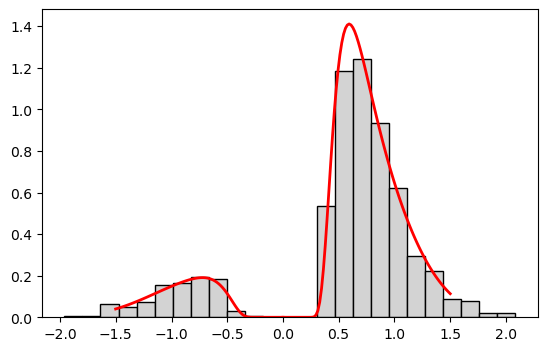

In [56]:
# define model parameters
# NOTE: For better sampling, we use the log10 of the scale and shape parameters.

phi = {'tnd' : 0.15,          # non-decision time
         'w' : 0.5,           # relative start point
        'mu' : 1.0,           # drift rate
         'b' : 3.0,          # threshold
      'lamb' : np.log10(0.412), # shape parameter
     'kappa' : np.log10(0.471), # scale parameter
         'c' : -1.0}          # collapse parameter

rt = pbp.simulate(N_sims = 1000, model = model, phi = phi)
fig = pbp.plot_rt(model = model, phi = phi, rt_max = 1.5, rt = rt);


In [57]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', 
       'p_b' : 3.0,
    'p_lamb' : 'Uniform("lamb", lower = -1.0, upper = 2.0)',
   'p_kappa' : 'Uniform("kappa", lower = -1.0, upper = 2.0)',
         'c' : -1.0}

c0 = {'rt' : rt, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b',
    'lamb' : 'p_lamb',
   'kappa' : 'p_kappa',
       'c' : 'c'}

c = {0 : c0}

idata = pbp.inference(model = model, x_res = 'very_high',
                     priors = p,       
                 conditions = c,       
                    samples = 50000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'weibull_thresholds')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [kappa, lamb, mu, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 50_000 draw iterations (0 + 150_000 draws total) took 107 seconds.


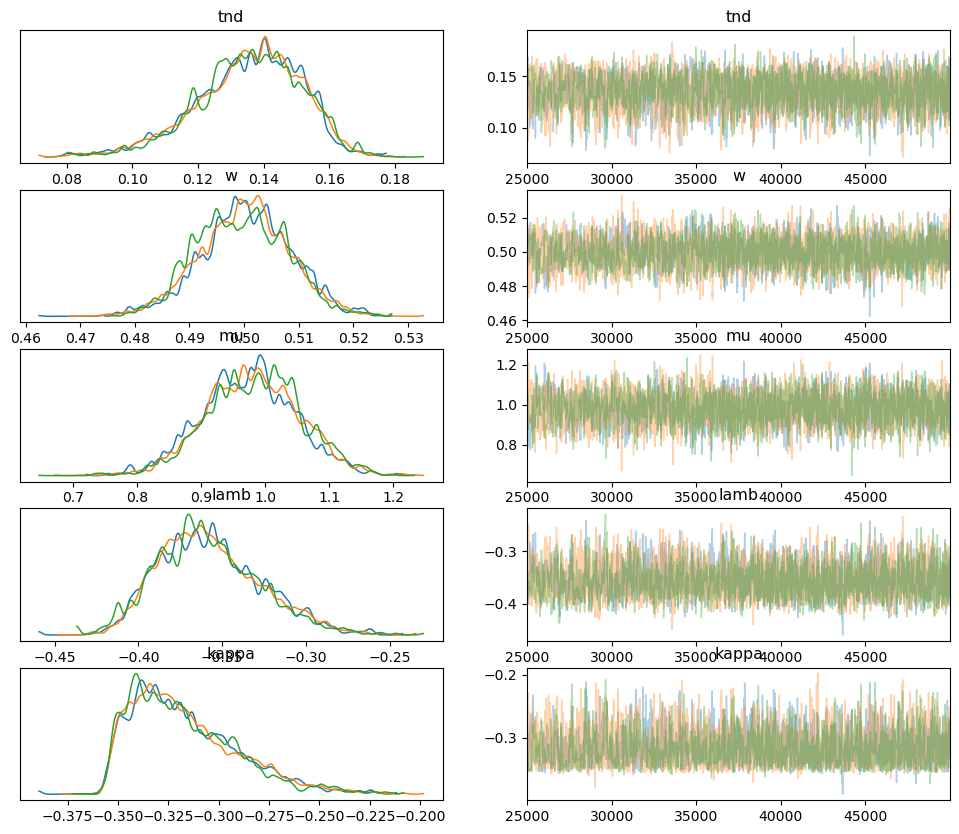

In [65]:
pbp.plot_idata(file_name = 'weibull_thresholds', burnin = 25000);


In [67]:
pbp.summary(file_name = 'weibull_thresholds', burnin = 25000)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.135,0.016,0.104,0.163,0.000,0.000,1750.0,2316.0,1.0
w,0.500,0.008,0.485,0.515,0.000,0.000,1520.0,2408.0,1.0
mu,0.979,0.073,0.848,1.122,0.002,0.001,1458.0,2597.0,1.0
lamb,-0.358,0.031,-0.408,-0.296,0.001,0.001,1723.0,2295.0,1.0
kappa,-0.317,0.026,-0.356,-0.270,0.001,0.000,1614.0,1691.0,1.0


(0.0, 1.0)

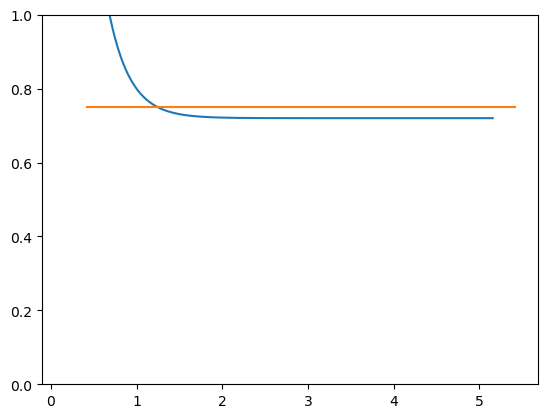

In [105]:
import matplotlib.pyplot as plt

b = 3.0
lamb = 10**(-0.6)
kappa = 10**(0.0)
c = -0.52

t = np.linspace(0.0, 5.0, 1000)
thres = b - 0.5*b*(1.0 - c)*( 1.0 - np.exp( -(t/lamb)**kappa) )

# tau = 1.0
# thres_test = b*np.exp(-t/tau)

plt.plot(t+0.156, thres)
# plt.plot(t, thres_test)

plt.plot(t+0.42, np.ones_like(t)*0.75)

plt.ylim(0.0,1.0)
